# 1. Import Necessary Libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set(style="whitegrid")

# 2. Load the Dataset

In [94]:
df = pd.read_csv('california_data.csv')
df.shape

(1741433, 46)

In [181]:
# Dropping Irrelevant features
cols = ["State", "Country", "Description", "Street", "ID", "Timezone", "Turning_Loop"]
df.drop(columns = cols, inplace = True)

# 3. Initial Data Exploration

### 3.1 Basic Info

In [96]:
# Display basic info about the dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741433 entries, 0 to 1741432
Data columns (total 45 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  Zipcode                object 
 15  Country                object 
 16  Timezone               object 
 17  Airport_Code           object 
 18  Weather_Timestamp      object 
 19  Temperature(F)         float64
 20  Wind_Chill(F)          float64
 21  Humidity(%)            float64
 22  Pres

In [97]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### 3.2 Descriptive Statistics

In [98]:
# Descriptive statistics for numerical features
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
         Severity   Start_Lat   Start_Lng     End_Lat     End_Lng  \
count 1741433.000 1741433.000 1741433.000 1104102.000 1104102.000   
mean        2.166      35.630    -119.500      35.652    -119.461   
std         0.407       2.093       1.937       2.132       1.920   
min         1.000      32.543    -124.375      32.542    -124.400   
25%         2.000      33.976    -121.520      33.975    -121.441   
50%         2.000      34.236    -118.440      34.265    -118.446   
75%         2.000      37.702    -117.920      37.704    -117.894   
max         4.000      42.005    -114.139      42.145    -114.140   

       Distance(mi)  Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
count   1741433.000     1695464.000    1230468.000  1693092.000   1704307.000   
mean          0.484          63.900         62.760       58.714        29.631   
std           1.353          13.591         14.595       24.215         0.776   
min           0.000         -

In [99]:
# Descriptive statistics for categorical features
print("\nCategorical Features:")
print(df.describe(include=['object']))


Categorical Features:
             ID   Source           Start_Time             End_Time  \
count   1741433  1741433              1741433              1741433   
unique  1741433        3              1394898              1555839   
top       A-729  Source1  2022-04-26 16:14:30  2019-10-17 18:07:45   
freq          1  1104102                   54                   31   

                               Description   Street         City       County  \
count                              1741430  1738991      1741422      1741433   
unique                              811862    67370         1268           58   
top     At I-405/San Diego Fwy - Accident.    I-5 N  Los Angeles  Los Angeles   
freq                                  1784    40887       156491       526851   

        Zipcode  Country    Timezone Airport_Code    Weather_Timestamp  \
count   1740836  1741433     1740836      1739317              1708628   
unique   129022        1           2          142               422496  

# 4. Data Cleaning and Modification

### 4.1 Tackling Missing Values

In [100]:
# Checking for missing values
def report_missing_values(dataframe):
    missing_values_percentage = dataframe.isnull().sum() / len(dataframe) * 100
    missing_values_percentage = missing_values_percentage.round(2)
    print("\nPercentage of Missing Values in Each Column:")
    print(missing_values_percentage)

report_missing_values(df)


Percentage of Missing Values in Each Column:
ID                       0.000
Source                   0.000
Severity                 0.000
Start_Time               0.000
End_Time                 0.000
Start_Lat                0.000
Start_Lng                0.000
End_Lat                 36.600
End_Lng                 36.600
Distance(mi)             0.000
Description              0.000
Street                   0.140
City                     0.000
County                   0.000
Zipcode                  0.030
Country                  0.000
Timezone                 0.030
Airport_Code             0.120
Weather_Timestamp        1.880
Temperature(F)           2.640
Wind_Chill(F)           29.340
Humidity(%)              2.780
Pressure(in)             2.130
Visibility(mi)           2.300
Wind_Direction           2.650
Wind_Speed(mph)          9.350
Precipitation(in)       32.510
Weather_Condition        2.280
Amenity                  0.000
Bump                     0.000
Crossing                

In [101]:
# Dropping columns with more than 20% of missing values
missing_values_percentage = df.isnull().sum() / len(df) * 100
columns_to_drop = missing_values_percentage[missing_values_percentage > 20].index
df.drop(columns = columns_to_drop, inplace=True)
print(columns_to_drop)

Index(['End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Precipitation(in)'], dtype='object')


In [102]:
# For each county, find the most common city and replace missing cities with this value
for county in df['County'].unique():
    most_common_city = df[df['County'] == county]['City'].mode()[0]
    df.loc[(df['County'] == county) & (df['City'].isnull()), 'City'] = most_common_city

# Similar approach for Zipcode
for county in df['County'].unique():
    most_common_zip = df[df['County'] == county]['Zipcode'].mode()[0]
    df.loc[(df['County'] == county) & (df['Zipcode'].isnull()), 'Zipcode'] = most_common_zip

In [103]:
report_missing_values(df)


Percentage of Missing Values in Each Column:
ID                      0.000
Source                  0.000
Severity                0.000
Start_Time              0.000
End_Time                0.000
Start_Lat               0.000
Start_Lng               0.000
Distance(mi)            0.000
Description             0.000
Street                  0.140
City                    0.000
County                  0.000
Zipcode                 0.000
Country                 0.000
Timezone                0.030
Airport_Code            0.120
Weather_Timestamp       1.880
Temperature(F)          2.640
Humidity(%)             2.780
Pressure(in)            2.130
Visibility(mi)          2.300
Wind_Direction          2.650
Wind_Speed(mph)         9.350
Weather_Condition       2.280
Amenity                 0.000
Bump                    0.000
Crossing                0.000
Give_Way                0.000
Junction                0.000
No_Exit                 0.000
Railway                 0.000
Roundabout              

In [112]:
# Imputing with the median for numerical columns with missing percentages from 5 - 20 percent
for col in ['Temperature(F)', 'Visibility(mi)', 'Wind_Speed(mph)']:
    df[col] = df[col].fillna(df[col].median())

for col in ['Humidity(%)']:
    df[col] = df[col].fillna(int(df[col].median()))

# Imputing with mode for categorical columns with missing percentages less than 5 percent
for col in ['Wind_Direction', 'Weather_Condition', 'Pressure(in)', 'Weather_Timestamp']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [117]:
# Dropping records for columns with missing percentage < 1%
def drop_records_with_low_missing_values(dataframe, threshold = 1.0):
    missing_values_percentage = dataframe.isnull().sum() / len(dataframe) * 100
    columns_to_check = missing_values_percentage[missing_values_percentage <= threshold].index
    df = dataframe.dropna(subset=columns_to_check)

    return df

df = drop_records_with_low_missing_values(df)
report_missing_values(df)


Percentage of Missing Values in Each Column:
ID                      0.000
Source                  0.000
Severity                0.000
Start_Time              0.000
End_Time                0.000
Start_Lat               0.000
Start_Lng               0.000
Distance(mi)            0.000
Description             0.000
Street                  0.000
City                    0.000
County                  0.000
Zipcode                 0.000
Country                 0.000
Timezone                0.000
Airport_Code            0.000
Weather_Timestamp       0.000
Temperature(F)          0.000
Humidity(%)             0.000
Pressure(in)            0.000
Visibility(mi)          0.000
Wind_Direction          0.000
Wind_Speed(mph)         0.000
Weather_Condition       0.000
Amenity                 0.000
Bump                    0.000
Crossing                0.000
Give_Way                0.000
Junction                0.000
No_Exit                 0.000
Railway                 0.000
Roundabout              

In [118]:
df.shape

(1736080, 41)

### 4.2 Adding a Variable: Elapsed_time

In [152]:
# Converting Start_Time And End_time to datetime64 type
df['Start_Time'] = pd.to_datetime(df['Start_Time'].str.slice(0,19), format= '%Y-%m-%d %H:%M:%S')
df['End_Time'] = pd.to_datetime(df['End_Time'].str.slice(0,19), format= '%Y-%m-%d %H:%M:%S')

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-729,Source2,3,2016-06-21 10:34:40,2016-06-21 11:04:40,38.085,-122.233,0.000,Right hand shoulder blocked due to accident on...,Magazine St,Vallejo,Solano,94591,US,US/Pacific,KAPC,2016-06-21 10:54:00,75.000,48.000,30.000,10.000,Variable,5.800,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-730,Source2,3,2016-06-21 10:30:16,2016-06-21 11:16:39,37.632,-122.084,0.000,Accident on I-880 Northbound at Exit 26 Tennys...,I-880 N,Hayward,Alameda,94544,US,US/Pacific,KHWD,2016-06-21 10:54:00,75.000,48.000,30.060,10.000,WSW,4.600,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-731,Source2,2,2016-06-21 10:49:14,2016-06-21 11:19:14,37.897,-122.071,0.000,Right lane blocked due to accident on CA-24 We...,I-680 N,Walnut Creek,Contra Costa,94595,US,US/Pacific,KCCR,2016-06-21 10:53:00,82.900,31.000,29.970,10.000,NNW,4.600,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3,A-732,Source2,3,2016-06-21 10:41:42,2016-06-21 11:11:42,37.334,-122.032,0.000,#4 &amp; HOV lane blocked due to accident on I...,N De Anza Blvd,Cupertino,Santa Clara,95014,US,US/Pacific,KNUQ,2016-06-21 10:56:00,75.900,48.000,30.040,10.000,NNE,4.600,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,A-733,Source2,2,2016-06-21 10:16:26,2016-06-21 11:04:16,37.251,-121.911,0.000,Right hand shoulder blocked due to accident on...,Norman Y Mineta Hwy,San Jose,Santa Clara,95118,US,US/Pacific,KRHV,2016-06-21 09:50:00,75.200,41.000,30.060,10.000,Variable,5.800,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [153]:
# Adding a variable elapsed_time
df['elapsed_time'] = df['End_Time'] - df['Start_Time']
df['elapsed_time'] = df['elapsed_time']/np.timedelta64(1,'m')
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,elapsed_time
0,A-729,Source2,3,2016-06-21 10:34:40,2016-06-21 11:04:40,38.085,-122.233,0.000,Right hand shoulder blocked due to accident on...,Magazine St,Vallejo,Solano,94591,US,US/Pacific,KAPC,2016-06-21 10:54:00,75.000,48.000,30.000,10.000,Variable,5.800,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,30.000
1,A-730,Source2,3,2016-06-21 10:30:16,2016-06-21 11:16:39,37.632,-122.084,0.000,Accident on I-880 Northbound at Exit 26 Tennys...,I-880 N,Hayward,Alameda,94544,US,US/Pacific,KHWD,2016-06-21 10:54:00,75.000,48.000,30.060,10.000,WSW,4.600,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,46.383
2,A-731,Source2,2,2016-06-21 10:49:14,2016-06-21 11:19:14,37.897,-122.071,0.000,Right lane blocked due to accident on CA-24 We...,I-680 N,Walnut Creek,Contra Costa,94595,US,US/Pacific,KCCR,2016-06-21 10:53:00,82.900,31.000,29.970,10.000,NNW,4.600,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,30.000
3,A-732,Source2,3,2016-06-21 10:41:42,2016-06-21 11:11:42,37.334,-122.032,0.000,#4 &amp; HOV lane blocked due to accident on I...,N De Anza Blvd,Cupertino,Santa Clara,95014,US,US/Pacific,KNUQ,2016-06-21 10:56:00,75.900,48.000,30.040,10.000,NNE,4.600,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,30.000
4,A-733,Source2,2,2016-06-21 10:16:26,2016-06-21 11:04:16,37.251,-121.911,0.000,Right hand shoulder blocked due to accident on...,Norman Y Mineta Hwy,San Jose,Santa Clara,95118,US,US/Pacific,KRHV,2016-06-21 09:50:00,75.200,41.000,30.060,10.000,Variable,5.800,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,47.833


In [172]:
# Adding a few more columns: dayof accident, hour of accident, Month of accident
df['day_of_week']= df['Start_Time'].dt.weekday.astype('int64')
df['hour_of_day']= df['Start_Time'].dt.hour.astype('int64')
df['month_of_year']= df['Start_Time'].dt.month.astype('int64')

# 5. Exploratory Analysis

### 5.1 Distribution of Numerical Features

#### 5.1.1 Univariate Analysis

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1736080 entries, 0 to 1741432
Data columns (total 45 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   Distance(mi)           float64       
 8   Description            object        
 9   Street                 object        
 10  City                   object        
 11  County                 object        
 12  Zipcode                object        
 13  Country                object        
 14  Timezone               object        
 15  Airport_Code           object        
 16  Weather_Timestamp      object        
 17  Temperature(F)         float64       
 18  Humidity(%)            floa

In [174]:
# Number of Numerical Features
ctr = 0 
for i in df.columns:
    if df[i].dtype == int or df[i].dtype==float:
        ctr+=1
        print(i)
print("Number of numerical features: ",ctr)

Severity
Start_Lat
Start_Lng
Distance(mi)
Temperature(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Speed(mph)
elapsed_time
day_of_week
hour_of_day
month_of_year
Number of numerical features:  13


True

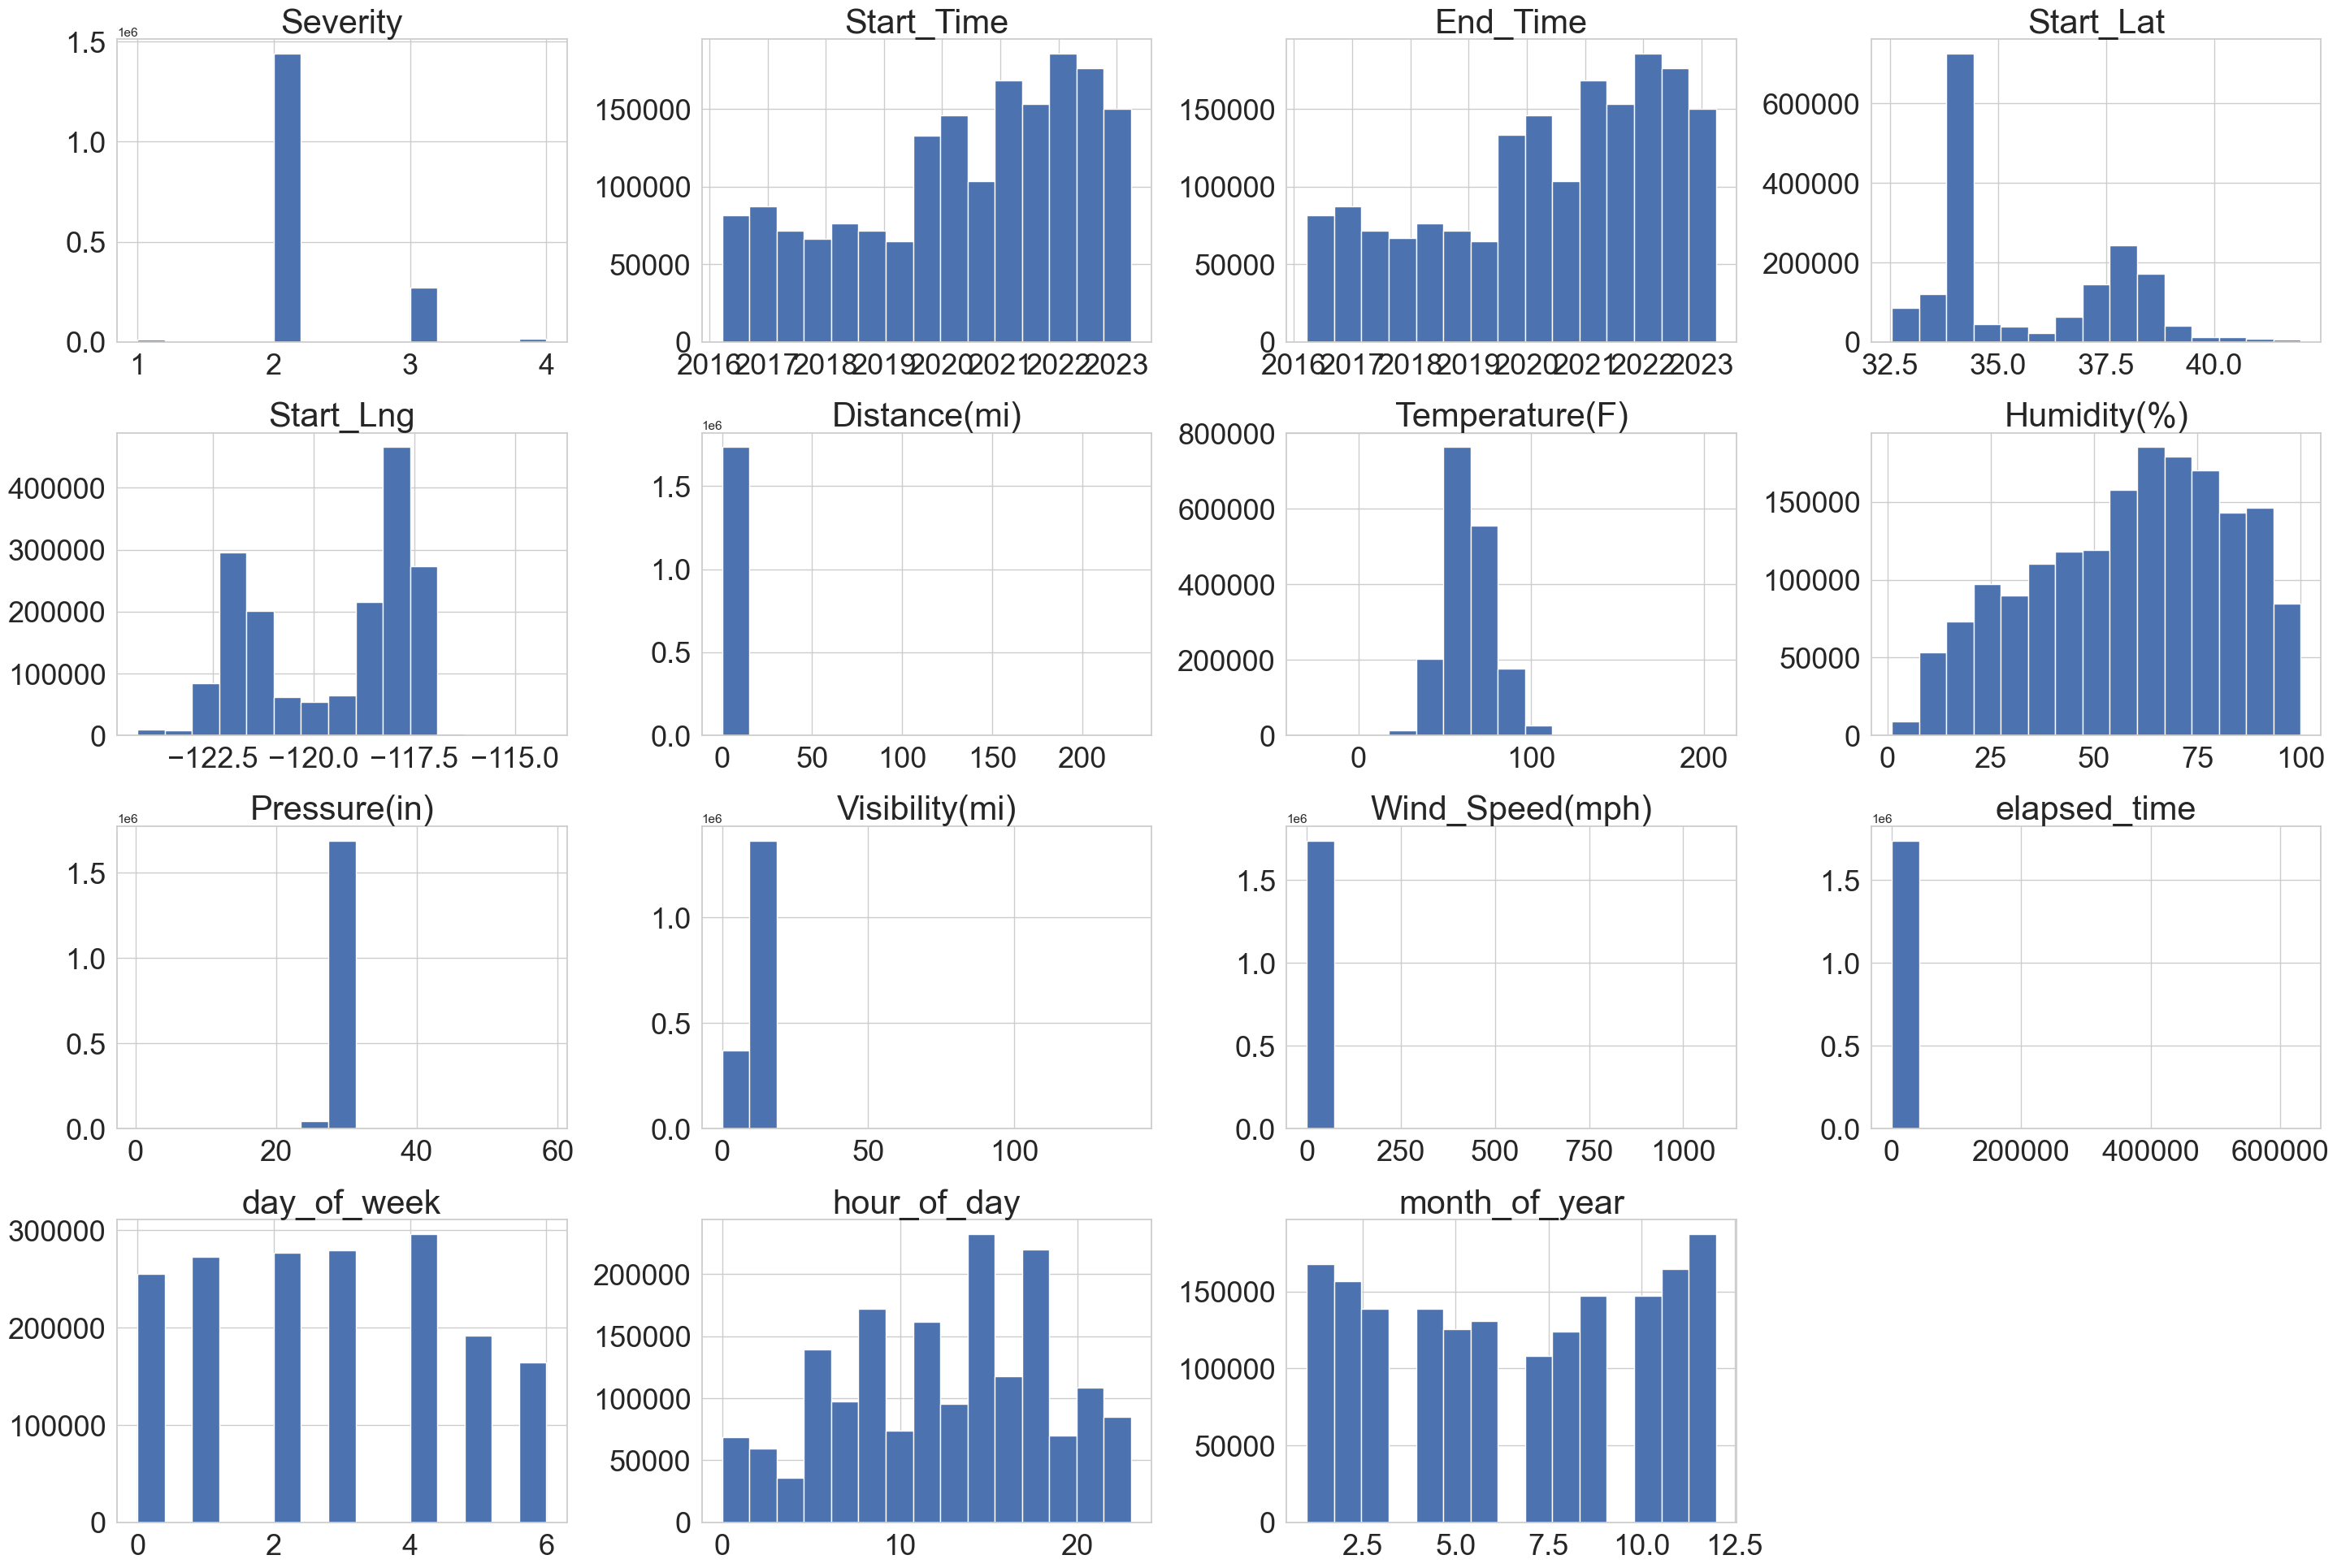

In [179]:
# Distribution
axes = df.hist(bins=15, figsize=(35, 30), layout=(5, 4))

for ax in axes.flatten():
    ax.set_title(ax.get_title(), fontsize=30) 
    ax.set_xlabel(ax.get_xlabel(), fontsize=24) 
    ax.set_ylabel(ax.get_ylabel(), fontsize=28)  
    ax.tick_params(axis='both', which='major', labelsize=26) 

plt.show()

Inference: 

1. **Severity**: The majority of accidents have a severity of *2 or 3*, with 2 being the most common. There are very few accidents with severity 1 or 4, indicating that most accidents are of moderate severity. There seems to be imbalance in this variable which will be a problem if we consider it as a predictor variable later on.

2. **Start_Time/End_Time**: Accidents appear to be more frequent during certain periods, possibly indicating seasonal or monthly trends.

3. **Start_Lat and Start_Lng (Latitude and Longitude)**: Both start latitude and longitude show a *unimodal* distribution, which suggests that accidents are concentrated in a specific geographic area. The peaks in these distributions indicate a particular location where accidents are more frequent.

4. **Temperature(F)**: The temperature distribution is *multimodal*, indicating that accidents have occurred over a range of different temperatures. 

5. **Humidity(%)**: This feature also shows a *multimodal* distribution with a slight skew towards higher humidity levels, implying that many accidents occur in conditions of moderate to high humidity.

5. **Pressure(in)**: The atmospheric pressure at the time of accidents seems to be *normally* distributed, suggesting no particular trend or bias towards specific pressure conditions during accidents.

6. **Visibility(mi)**: There's a sharp peak at high visibility distances, which indicates that most accidents happen in *clear* conditions. The lack of bars at lower visibility might be due to less frequent driving or fewer accidents reported during poor visibility conditions.

7. **Wind_Speed(mph)**: The wind speed histogram shows a *right-skewed* distribution, meaning most accidents happen at lower wind speeds, with fewer accidents occurring as wind speed increases.

8. **Distance(mi)**: This feature has a highly *right-skewed* distribution with most accidents occurring with a minimal distance impact, possibly indicating that many accidents happen without affecting a significant stretch of road.

9. **day_of_week**: Accidents appear to increase *midweek*, suggesting a possible correlation with workweek traffic patterns.

10. **hour_of_day**: There are peaks indicative of *rush hours*, suggesting more accidents occur during times of *heavy traffic*.

11. **month_of_year**: The fluctuation in accidents throughout the year may reflect *seasonal influences* on driving conditions.

12. **elapsed_time**: Most accidents have a *short duration*, with a steep decline in frequency as duration increases, indicating quick resolutions.

Overall, this initial visualization indicates that the majority of reported accidents occur under **moderate severity, in clear and dry conditions, and are concentrated in certain geographic locations**. It’s important to consider that these are raw distributions and do not account for other factors that might affect accident rates, such as traffic volume, road conditions, and driver behavior. More in-depth analysis would be required to draw more concrete conclusions and to understand the causal factors behind these distributions.

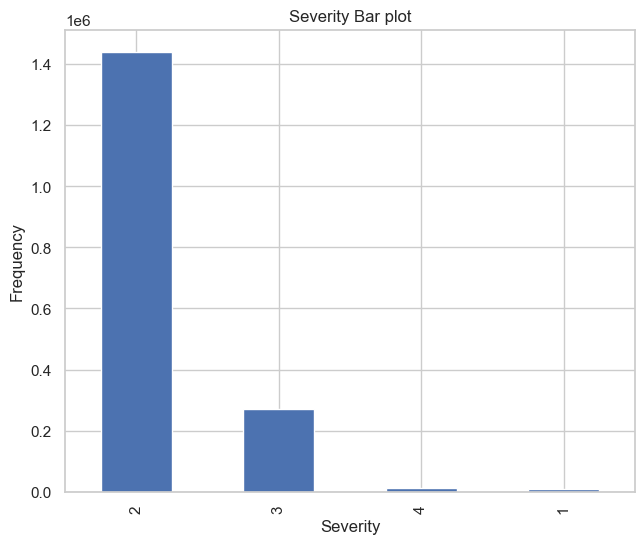

In [185]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,3)
plt1 = df.Severity.value_counts().plot(kind='bar')
plt.title('Severity Bar plot')
plt1.set(xlabel = 'Severity', ylabel='Frequency')

plt.show()

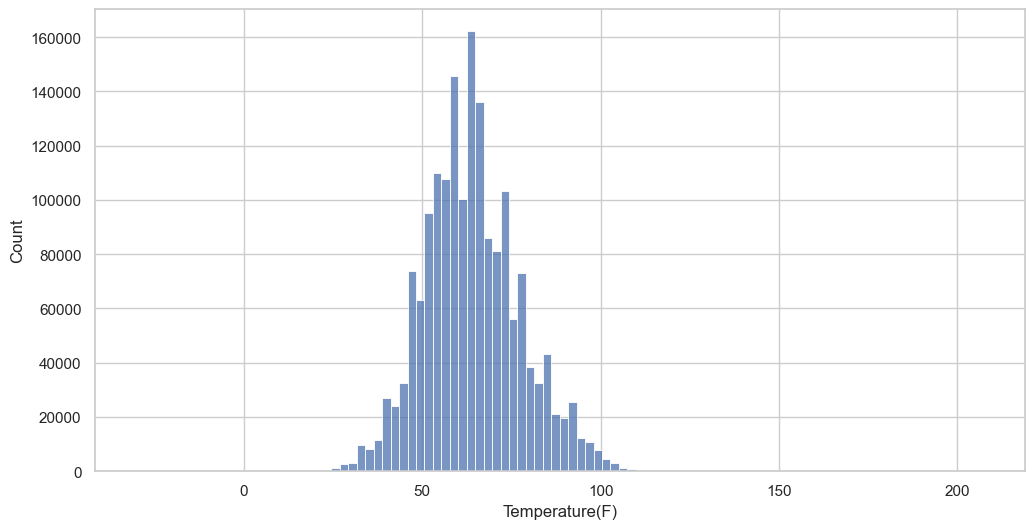

In [183]:
plt.figure(figsize=(12,6))
sns.histplot(df['Temperature(F)'], kde=False, bins=100)
plt.show()

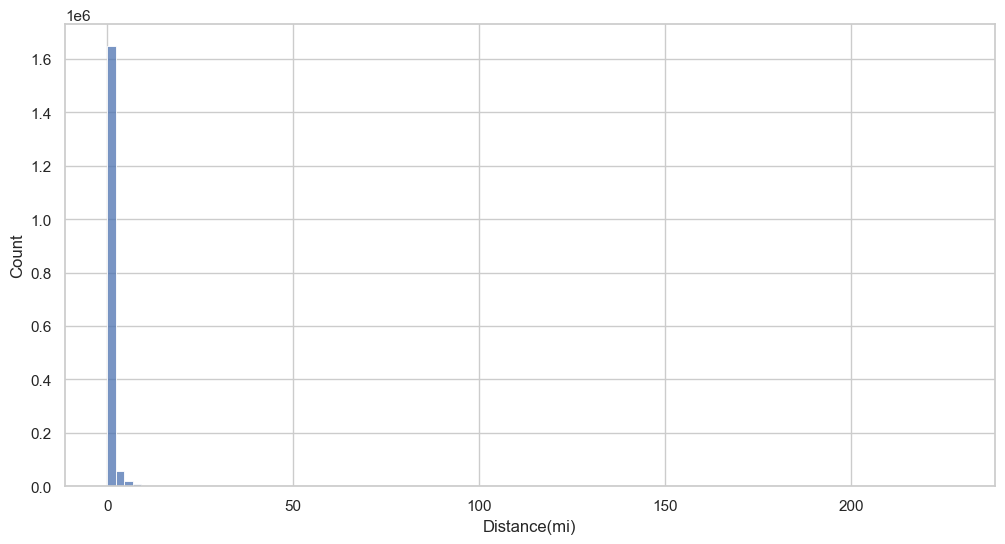

In [193]:
# Histogram for 'Distance(mi)'
plt.figure(figsize=(12,6))
sns.histplot(df['Distance(mi)'], kde=False, bins=100)
plt.show()

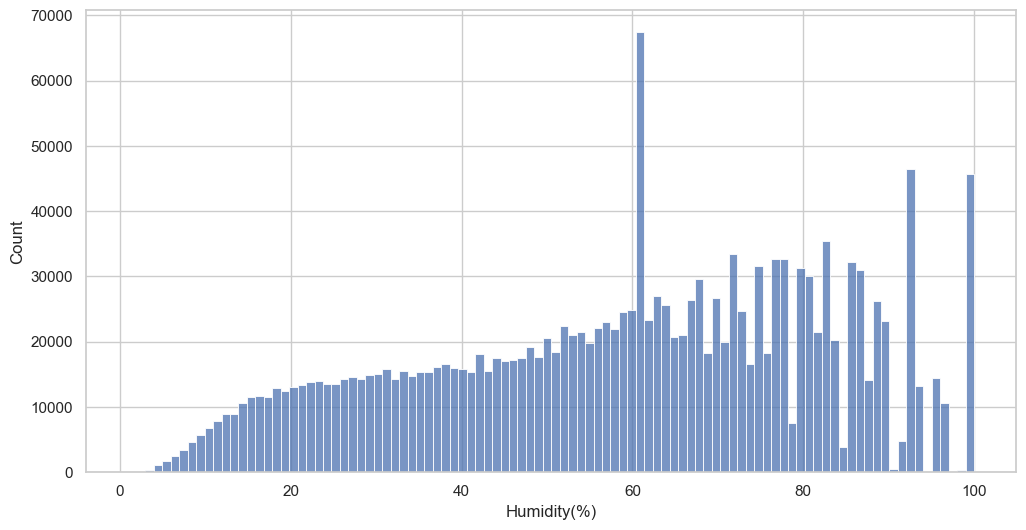

In [195]:
# Histogram for 'Humidity'
plt.figure(figsize=(12,6))
sns.histplot(df['Humidity(%)'], kde=False, bins=100)
plt.show()

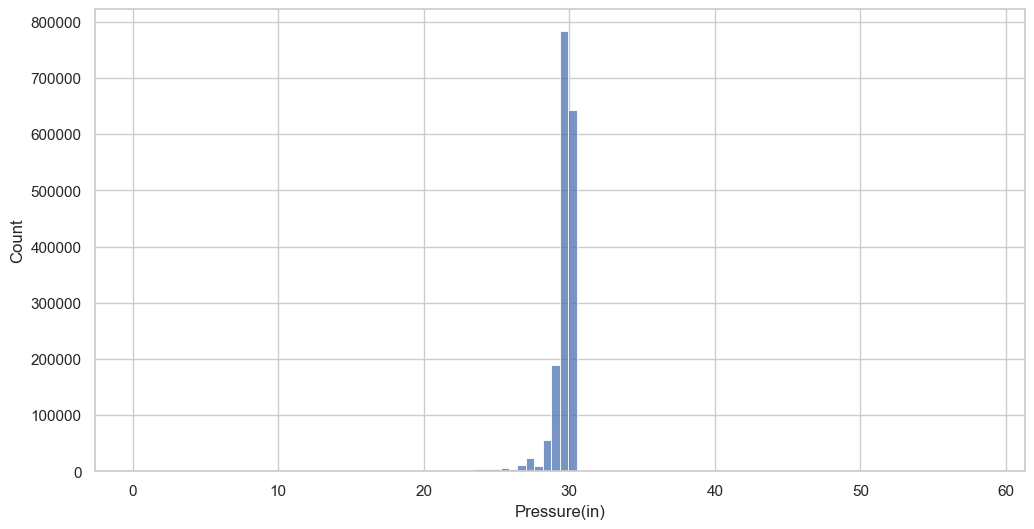

In [196]:
# Histogram for 'Pressure'
plt.figure(figsize=(12,6))
sns.histplot(df['Pressure(in)'], kde=False, bins=100)
plt.show()

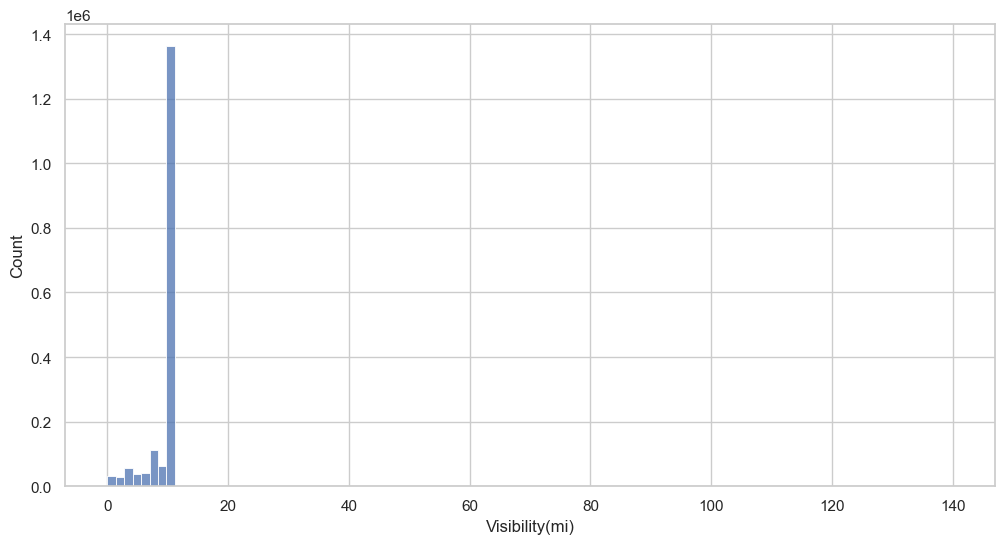

In [197]:
# Histogram for 'Visibility'
plt.figure(figsize=(12,6))
sns.histplot(df['Visibility(mi)'], kde=False, bins=100)
plt.show()

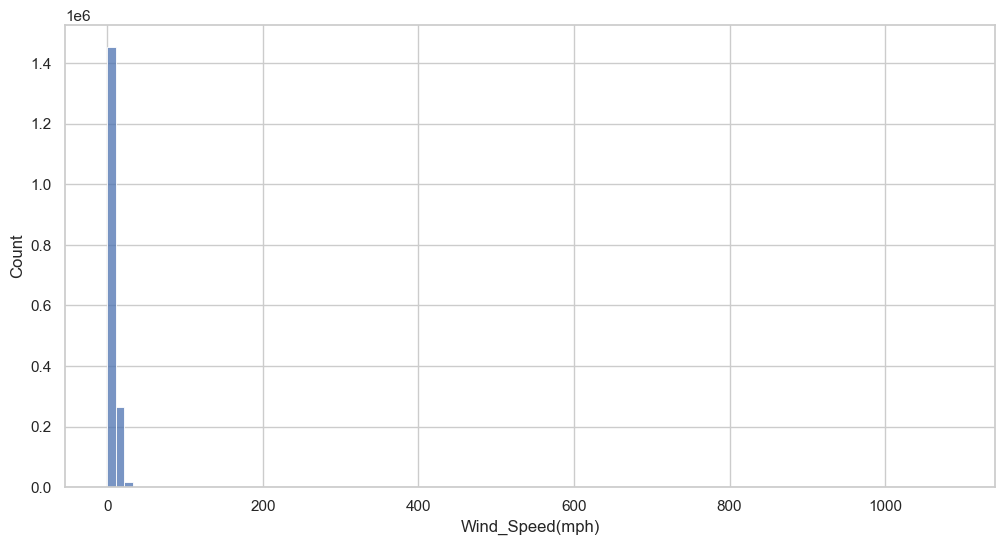

In [201]:
# Histogram for 'Wind speed'
plt.figure(figsize=(12,6))
sns.histplot(df['Wind_Speed(mph)'], kde=False, bins=100)
plt.show()

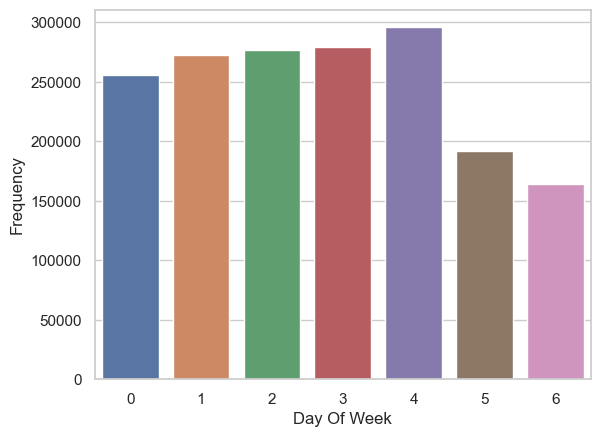

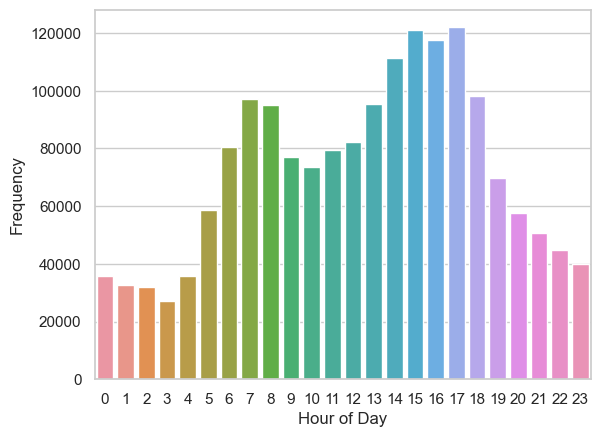

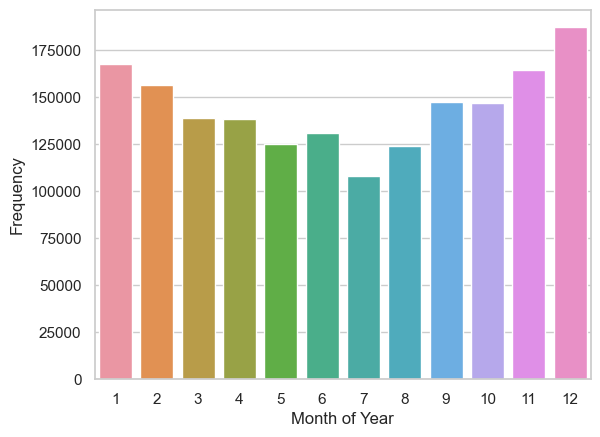

In [192]:
# Count plot for 'day_of_week'
sns.countplot(x='day_of_week', data=df)
plt.xlabel('Day Of Week')
plt.ylabel('Frequency')
plt.show()

# Count plot for 'hour_of_day'
sns.countplot(x='hour_of_day', data=df)
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

# Count plot for 'month_of_year'
sns.countplot(x='month_of_year', data=df)
plt.xlabel('Month of Year')
plt.ylabel('Frequency')
plt.show()

#### 5.1.2 Bivariate Analysis

<Axes: xlabel='Severity', ylabel='elapsed_time'>

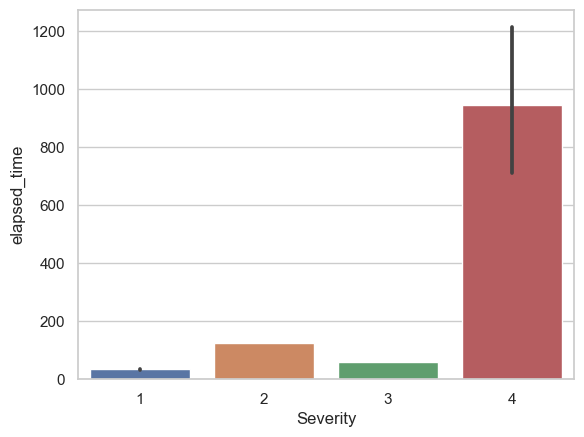

In [209]:
sns.barplot(x='Severity', y='elapsed_time', data=df)

Inference:

1. **Severity 1**: The accidents with severity 1 have the shortest average elapsed time, suggesting these could be minor incidents.
2. **Severity 2 and 3**: Severity 2 and 3 accidents have a higher average elapsed time than severity 1, which could indicate a moderate impact on traffic or longer resolution times.
3. **Severity 4**: There is a significant jump in the average elapsed time for severity 4 accidents, which are likely to be the most severe. The long bar suggests these incidents have a substantial impact, potentially involving more serious damages or injuries, leading to longer durations for clearance.

The error bar on the severity 4 column indicates a high variance in the elapsed time for these incidents, which suggests a wide range of outcomes within this category.

### 5.2 Analysis of Categorical Features

#### 5.2.1 Univariate Analysis

In [212]:
print(df.select_dtypes(include=['object', 'category']).describe().T)

                         count  unique                  top     freq
Source                 1736080       3              Source1  1099450
City                   1736080    1163          Los Angeles   156420
County                 1736080      58          Los Angeles   526146
Zipcode                1736080  128760                91761    11245
Airport_Code           1736080     141                 KCQT   118247
Weather_Timestamp      1736080  422220  2022-03-13 01:53:00    30966
Wind_Direction         1736080      24                 CALM   365863
Weather_Condition      1736080      87                 Fair   807961
Sunrise_Sunset         1736080       2                  Day  1130849
Civil_Twilight         1736080       2                  Day  1203739
Nautical_Twilight      1736080       2                  Day  1289579
Astronomical_Twilight  1736080       2                  Day  1362233


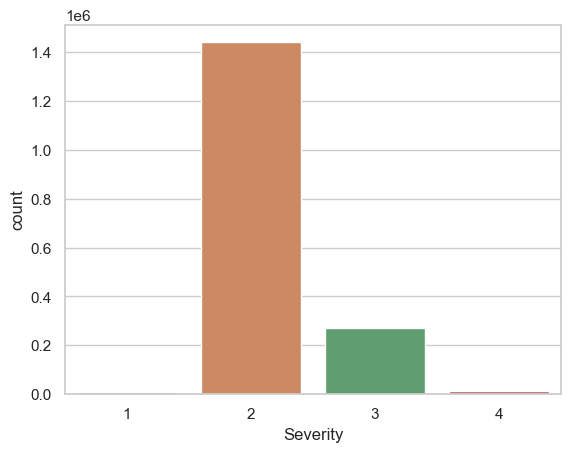

In [109]:
# Severity
sns.countplot(x='Severity', data=df)
plt.show()

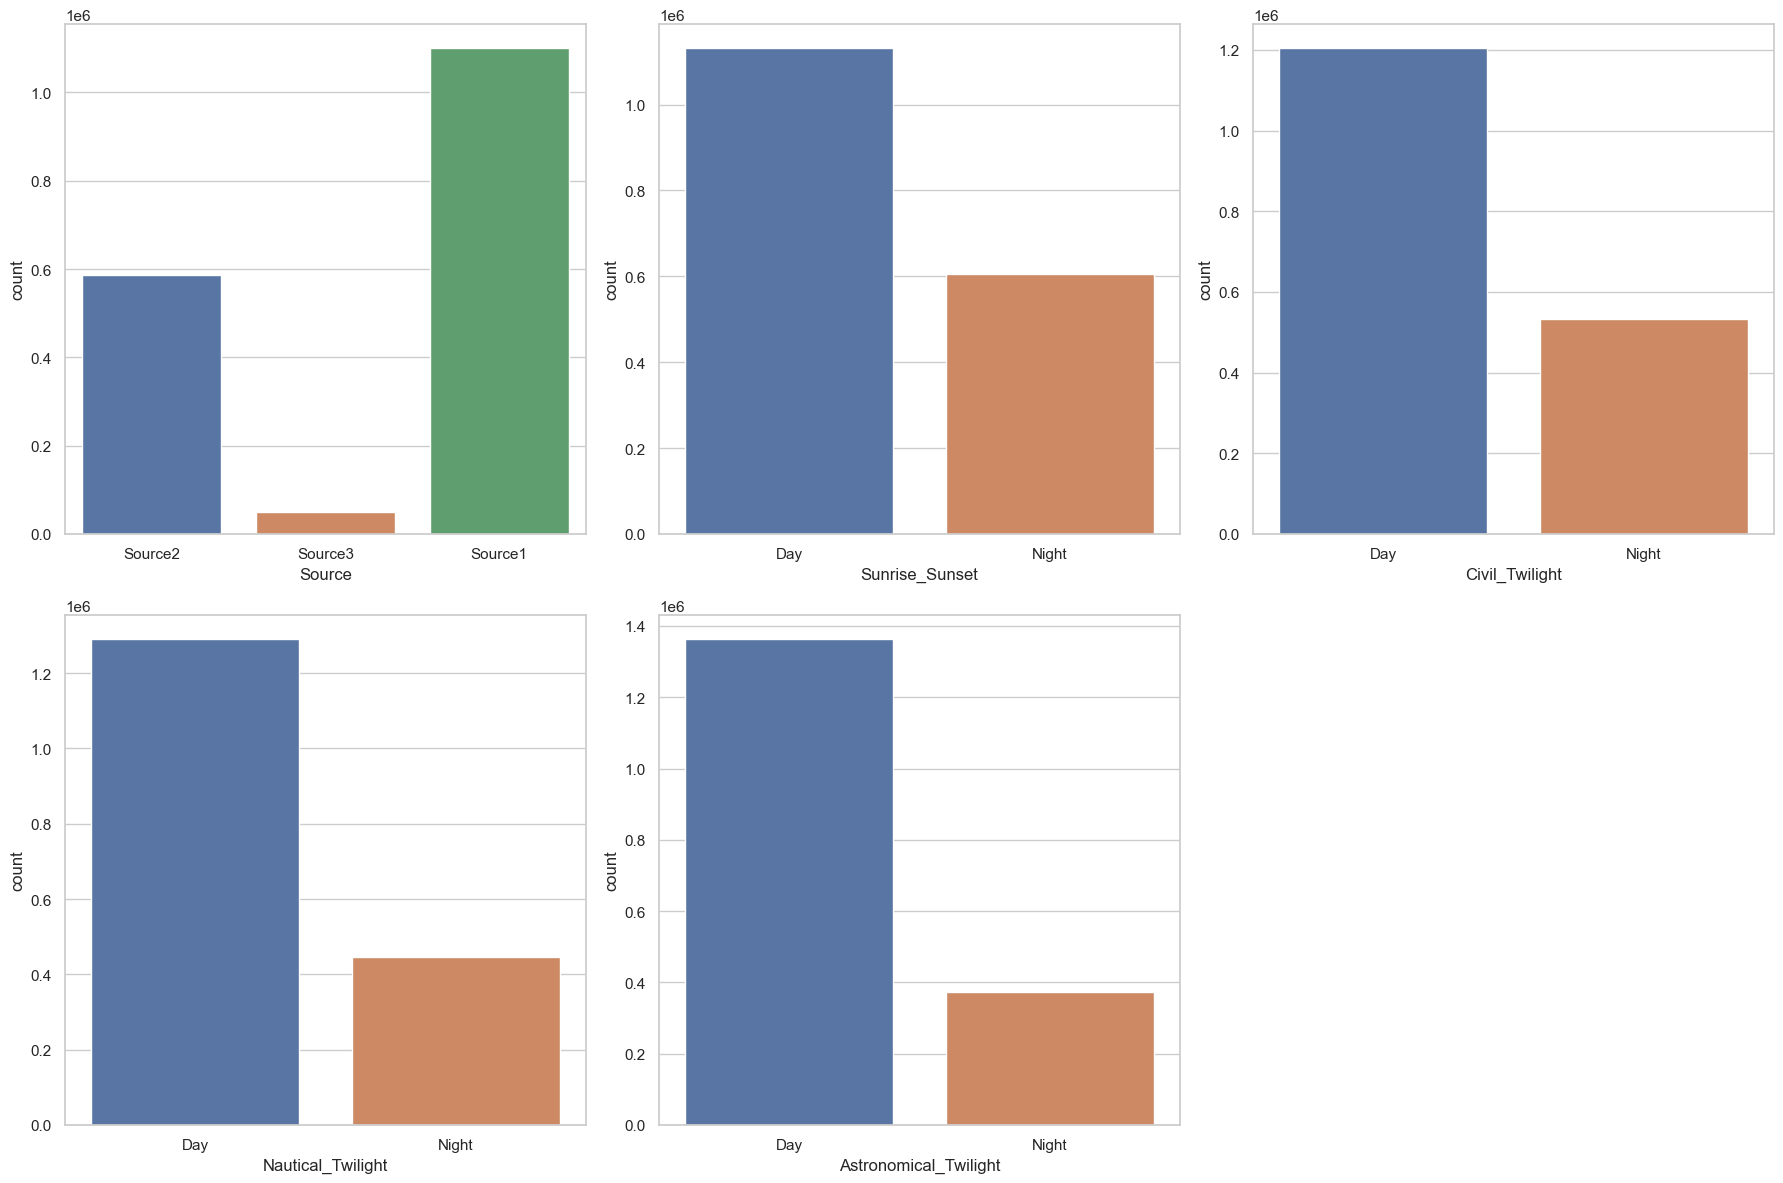

In [230]:
plt.figure(figsize=(18, 12))

cols = ['Source', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

for i in range(len(cols)) :
    plt.subplot(2, 3, i+1)  
    sns.countplot(x= cols[i], data=df)

plt.tight_layout()
plt.show()

Inference:

1. **Source**: The majority of data comes from 'Source1', which suggests that there is an imbalance in the representation of sources. 'Source2' and 'Source3' are much less represented.

2. **Sunrise_Sunset**: There are significantly more accidents reported during the day than at night.

3. **Civil_Twilight**: Similarly, more accidents occur during the day than during civil twilight or night.

4. **Nautical_Twilight**: The pattern continues with most accidents happening during the day, as compared to nautical twilight or night.

5. **Astronomical_Twilight**: Again, day incidents are more prevalent than those occurring during astronomical twilight or night.



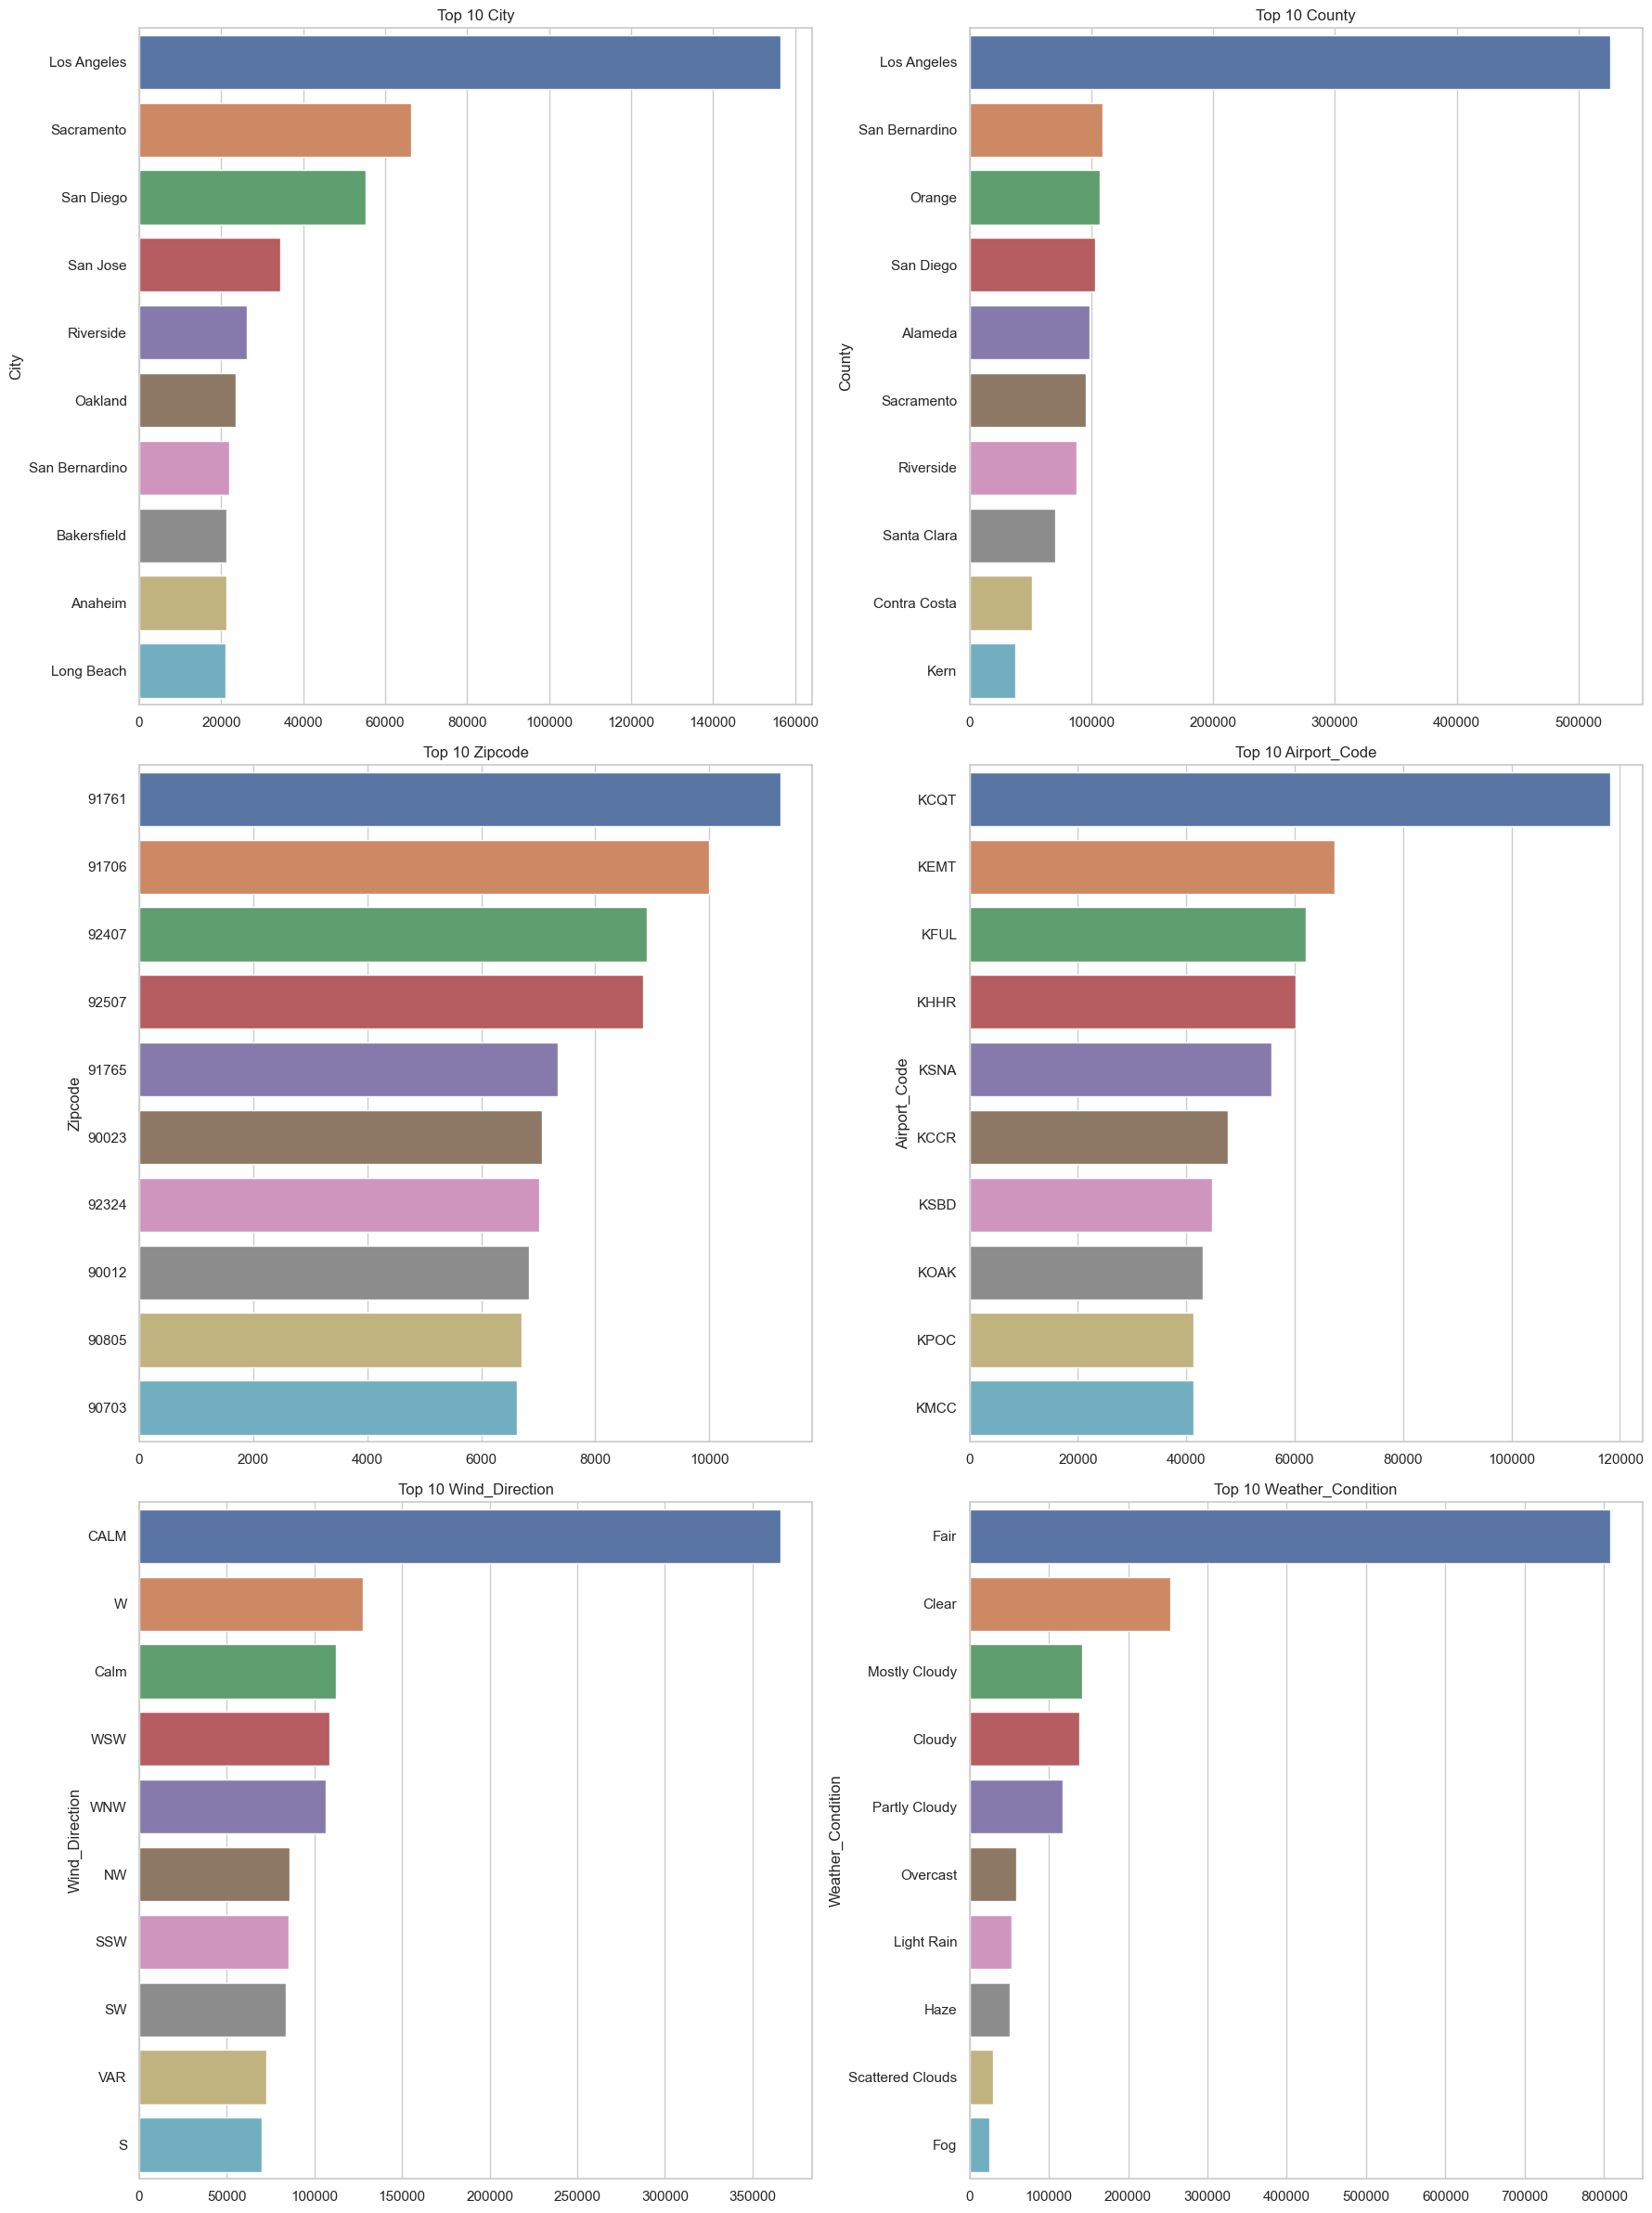

In [234]:
plt.figure(figsize=(18, 24))

cols = ['City', 'County', 'Zipcode', 'Airport_Code', 'Wind_Direction', 'Weather_Condition']

for i, col in enumerate(cols):
    plt.subplot(3, 2, i+1)  
    order = df[col].value_counts().iloc[:10].index
    sns.barplot(x=df[col].value_counts().iloc[:10].values, y=order)
    plt.title(f'Top 10 {col}')

plt.tight_layout()
plt.show()

Inferences:
1. **City and County**: The distribution of accidents is not uniform across cities and counties, with locations like Los Angeles having a significantly higher number of reported accidents. This could indicate urban areas with higher traffic volumes or areas with higher accident reporting rates.

2. **Zipcode**: Accidents are concentrated in certain zip codes, suggesting specific areas that might have higher traffic or risk factors contributing to accidents.

3. **Airport_Code**: The presence of certain airport codes may correlate with traffic patterns or could reflect the proximity to major roads or urban centers.

4. **Wind_Direction**: The wind direction 'CALM' is the most frequently reported condition, followed by various specific directions, indicating that wind direction is a well-recorded feature but may not have a strong influence on the frequency of accidents.

5. **Weather_Condition**: 'Fair' and 'Clear' are the most common weather conditions reported during accidents, which may suggest that adverse weather is not a leading cause of accidents in this dataset.

In [236]:
# Checking Boolean Variables
print(df.select_dtypes(include=['bool', 'category']).describe().T)

                   count unique    top     freq
Amenity          1736080      2  False  1723119
Bump             1736080      2  False  1735063
Crossing         1736080      2  False  1643805
Give_Way         1736080      2  False  1733888
Junction         1736080      2  False  1551239
No_Exit          1736080      2  False  1734212
Railway          1736080      2  False  1718223
Roundabout       1736080      2  False  1736021
Station          1736080      2  False  1695067
Stop             1736080      2  False  1680704
Traffic_Calming  1736080      2  False  1734594
Traffic_Signal   1736080      2  False  1601980
Turning_Loop     1736080      1  False  1736080


This indicates that Accidents happen in places where such factors are *not* present which can be pre-assumed because for example; It is more likely for an accident to take place where Traffic Sign or a bump is absent.

### 5.3 Correlation Analysis

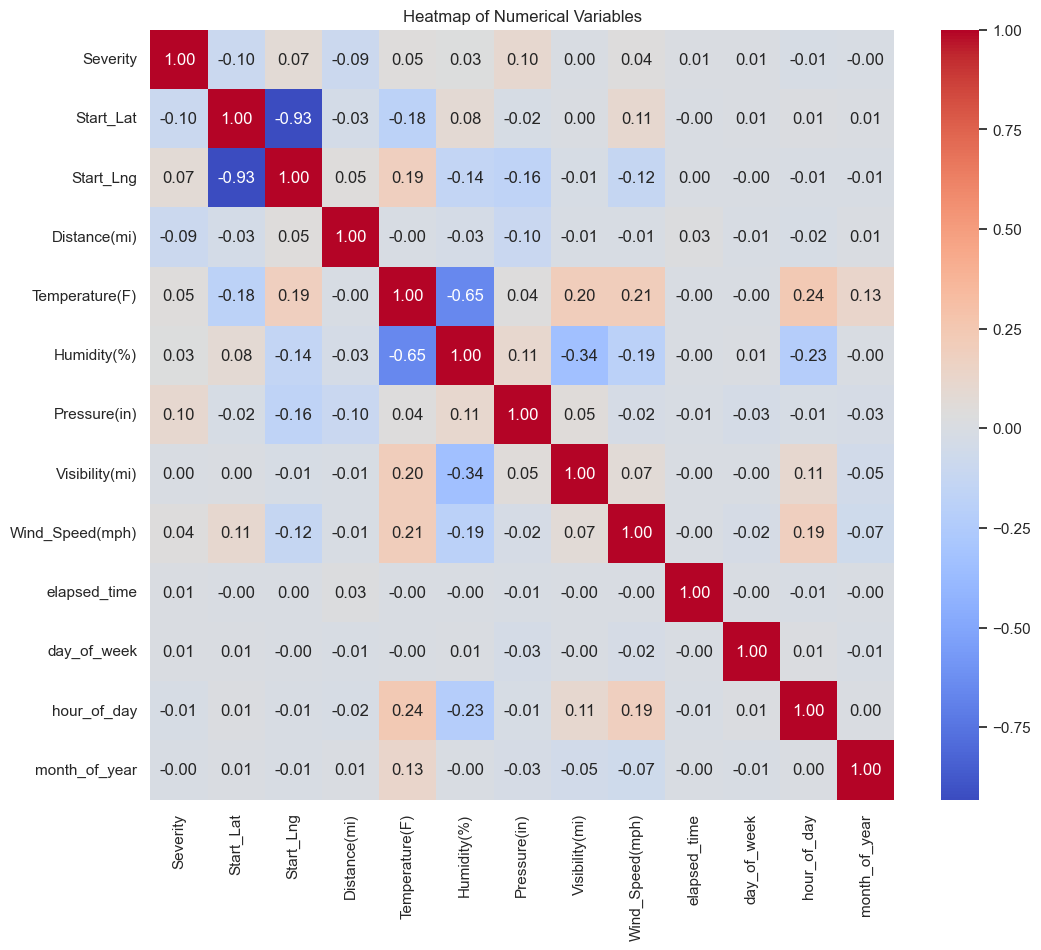

In [238]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

corr = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap of Numerical Variables')
plt.show()

### 5.4 Geospatial Analysis

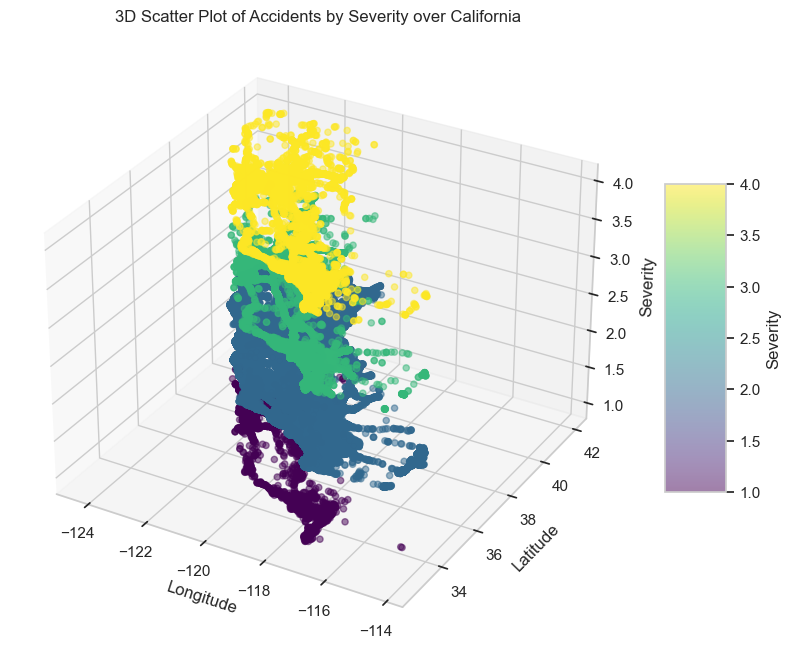

In [247]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Start_Lng'], df['Start_Lat'], df['Severity'],
                     c=df['Severity'], cmap='viridis', alpha=0.5)

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Severity')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Severity')

ax.set_title('3D Scatter Plot of Accidents by Severity over California')

plt.show()

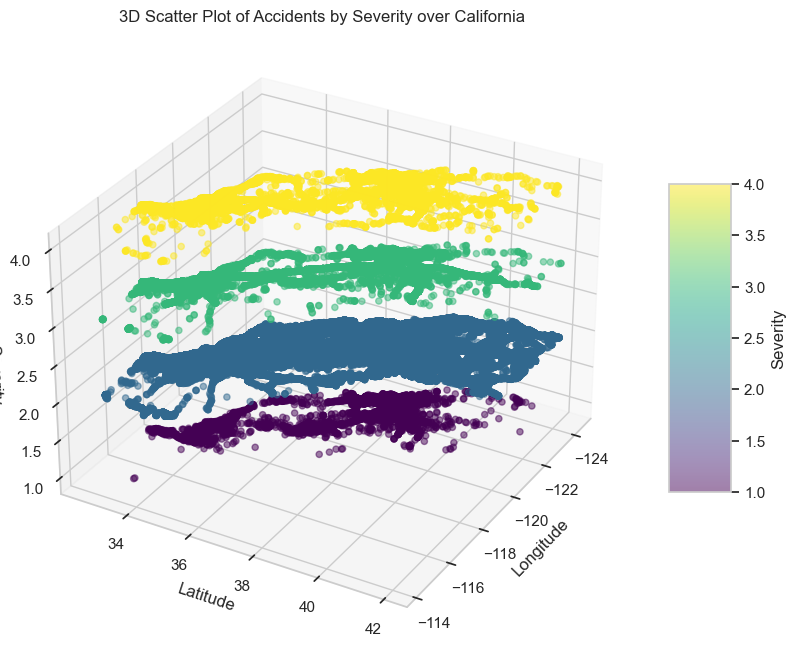

In [248]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(df['Start_Lng'], df['Start_Lat'], df['Severity'],
                     c=df['Severity'], cmap='viridis', alpha=0.5)

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Severity')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Severity')


ax.set_title('3D Scatter Plot of Accidents by Severity over California')

ax.view_init(elev=30, azim=30) 


plt.show()


Inference:

1. Accidents are distributed across the state but seem to be concentrated in certain areas, possibly around major cities or along specific highways.

2. The severity of accidents (color-coded) varies across the state. It appears that areas with a higher density of accidents also show a range of severities from low (blue) to high (yellow).

3. There's a noticeable cluster of high-severity accidents in one area, which could indicate a region with more severe accidents or could be a data reporting artifact.



# 6. Data Preprocessing